<h1 align="center">5.4 Inheritance</h1>

#### Base Classes and Subclasses

Often, an object of one class _is an_ object of another class as well. 

For example, a CarLoan _is a_ Loan. Class CarLoan can be said to
inherit from class Loan. 

In this context, class Loan is a base class, and class CarLoan is a subclass. A CarLoan _is a_ specific type of Loan, but it’s incorrect to claim that every Loan is a CarLoan.

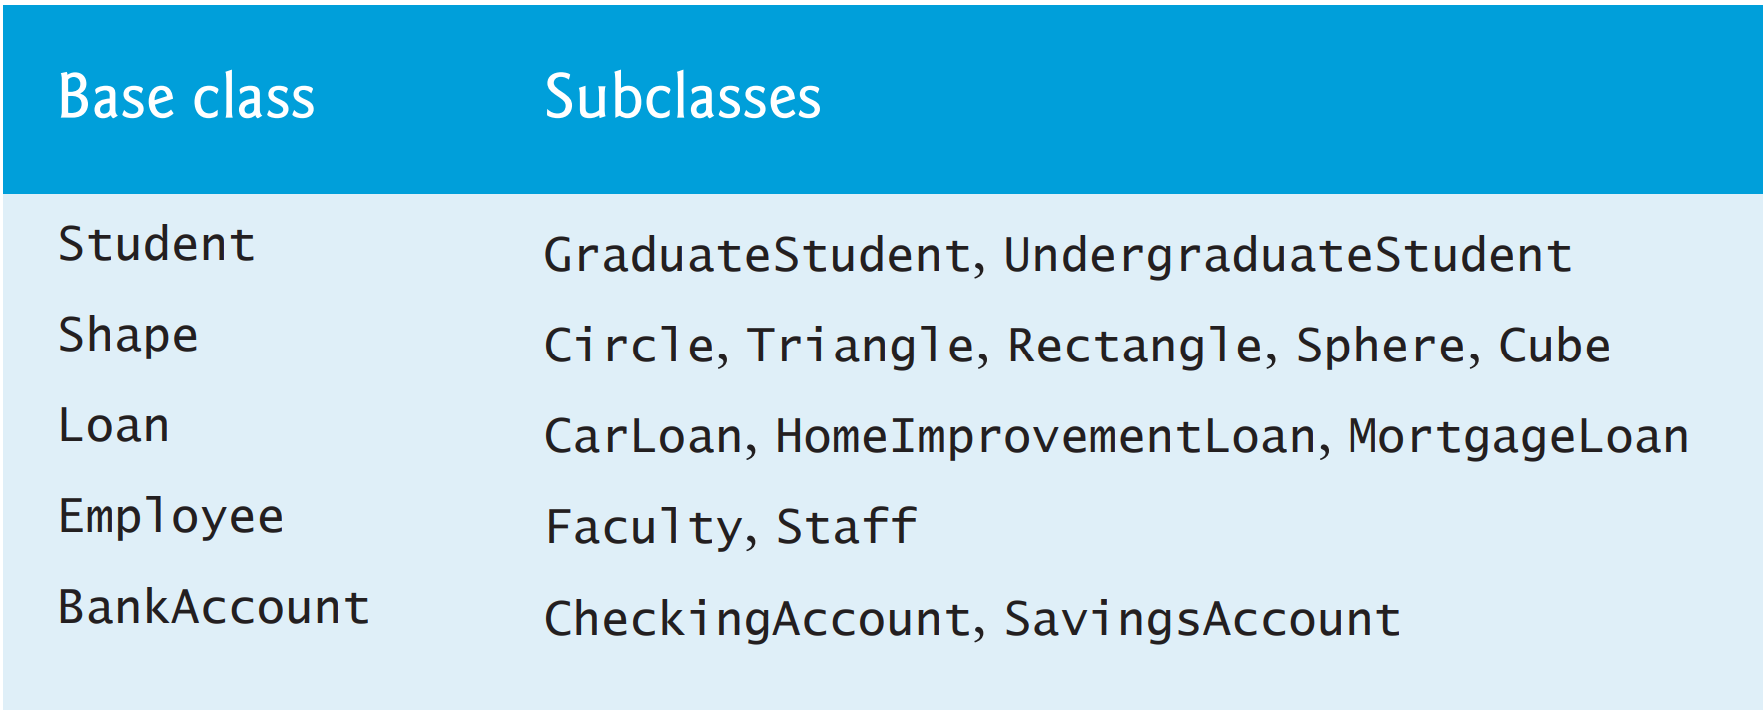

Because every subclass object is an object of its base class, and one base class can have many subclasses, the set of objects represented by a base class is often larger than the set of objects represented by any of its subclasses. 

For example, the base class Vehicle represents all vehicles, including cars, trucks, boats, bicycles and so on. By contrast, subclass Car represents a smaller, more specific subset of vehicles.

#### Inheritance Hierarchy

Inheritance relationships form tree-like hierarchical structures. A base class exists in a hierarchical relationship with its subclasses.

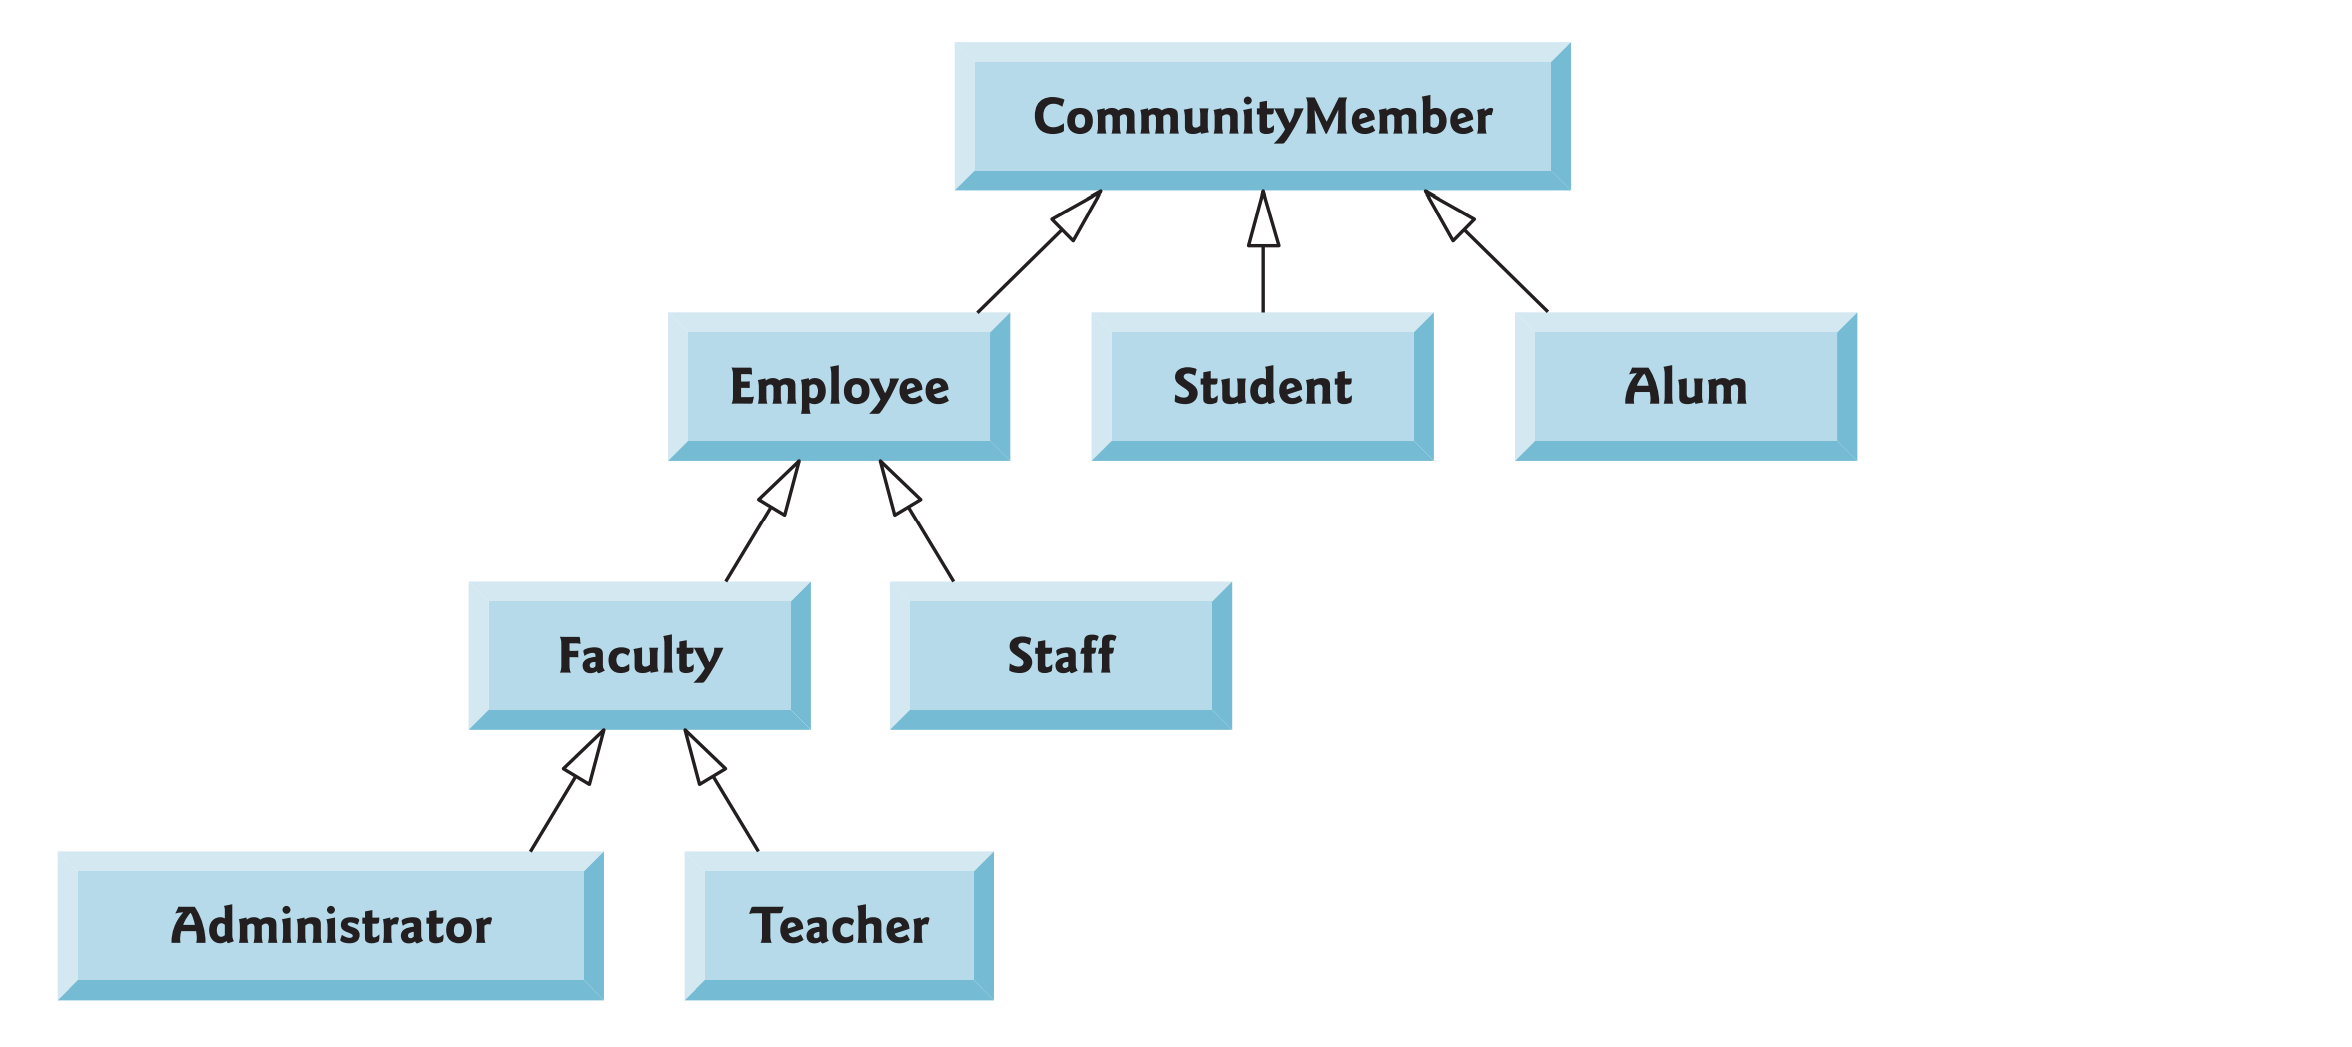

With single inheritance, a class is derived from one base class. With multiple inheritance, a subclass inherits from two or more base classes.

Each arrow in the hierarchy represents an _is-a_ relationship. As we follow the arrows upward in this class hierarchy, we can state, for example, that “an Employee is a CommunityMember” and “a Teacher is a Faculty member.” 

CommunityMember is the direct base class of Employee, Student and Alum and is an indirect base class of all the other classes in the diagram. 

Starting from the bottom, you can follow the arrows and apply the is-a
relationship up to the topmost superclass. For example, Administrator is a Faculty member, is an Employee, is a CommunityMember and, of course, ultimately is an object.

#### “is a” vs. “has a”

Inheritance produces __“is-a” relationships__ in which an object of a subclass type may also be treated as an object of the base-class type. 

You’ve also seen “has-a” (composition) relationships in which a class has references to one or more objects of other classes as members. 

#### Building an Inheritance Hierarchy; Introducing Polymorphism

Let’s use a hierarchy containing types of employees in a company’s payroll app to discuss the relationship between a base class and its subclass. All employees of the company have a lot in common, but commission employees (who will be represented as objects of a base class) are paid a percentage of their sales, while salaried commission employees (who will be represented as objects of a subclass) receive a percentage of their sales plus a base salary.

First, we present base class CommissionEmployee. Next, we create a subclass SalariedCommissionEmployee that inherits from class CommissionEmployee. Then, we create a SalariedCommissionEmployee object and demonstrate that it has all the capabilities of the base class and the subclass, but calculates its earnings differently.

#### Base Class CommissionEmployee

Consider class CommissionEmployee, which provides the following features:

- Method __init__, which creates the data attributes _first_name, _last_name and _ssn (Social Security number), and uses the setters of properties gross_sales and commission_rate to create their corresponding data attributes.

- Read-only properties first_name, last_name and ssn, which return the corresponding data attributes.

- Read-write properties gross_sales and commission_rate, in which the setters perform data validation.

- Method earnings, which calculates and returns a CommissionEmployee’s earnings.

- Method __repr__, which returns a string representation of a CommissionEmployee.Base Class CommissionEmployee

In [10]:
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""
    
    def __init__(self, first_name, last_name, ssn, gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = Decimal(gross_sales)  # validate via property
        self.commission_rate = Decimal(commission_rate)  # validate via property

    # ---------------- Properties ----------------
    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn

    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid."""
        sales = Decimal(sales)
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= 0')
        self._gross_sales = sales

    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        rate = Decimal(rate)
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError('Commission rate must be between 0 and 1 (exclusive)')
        self._commission_rate = rate

    # ---------------- Methods ----------------
    def earnings(self):
        """Calculate total earnings.""" 
        return self.gross_sales * self.commission_rate
    
    def __repr__(self):
        """Return string representation for repr()."""
        return (
            f'{"CommissionEmployee":<25}: {self.first_name} {self.last_name}\n'
            f'{"Social security number":<25}: {self.ssn}\n'
            f'{"Gross sales":<25}: {self.gross_sales:,.2f}\n'
            f'{"Commission rate":<25}: {self.commission_rate:.2f}\n'
            f'{"Earnings":<25}: {self.earnings():,.2f}'
        )


#### Testing Class CommissionEmployee

First, create and display a Com- missionEmployee:

In [2]:
from decimal import Decimal

In [3]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('10000.00'), Decimal('0.06'))
c

AttributeError: 'CommissionEmployee' object has no attribute 'first_name'

Let’s calculate and display the CommissionEmployee’s earnings:

In [4]:
print(f'{c.earnings():,.2f}')

600.00


Let’s change the CommissionEmployee’s gross sales and commission rate, then recalculate the earnings:

In [5]:
c.gross_sales = Decimal('20000.00')
c.commission_rate = Decimal('0.1')
print(f'{c.earnings():,.2f}')

2,000.00


#### All Classes Inherit Directly or Indirectly from Class object

You use inheritance to create new classes from existing ones. In fact, _every_ Python class inherits from an existing class. 

When you do not explicitly specify the base class for a new class, Python assumes that the class inherits directly from class __object__. The Python class hierarchy begins with class object, the direct or indirect base class of every class. 

So, class CommissionEmployee’s header could have been written as

<code>class CommissionEmployee(object):</code>

Class CommissionEmployee inherits all the methods of class __object__. Class object does not have any data attributes. 

Two of the many methods inherited from object are __repr__ and __str__. So every class has these methods that return string representations of the objects on which they’re called. 

When a base-class method implementation is inappropriate for a derived class, that method can be overridden (i.e., redefined) in the derived
class with an appropriate implementation.

#### Subclass SalariedCommissionEmployee

Many of a SalariedCommissionEmployee’s capabilities are similar, if not identical, to those of class CommissionEmployee. Both types of employees have first name, last name, Social Security number, gross sales and commission rate data attributes, and properties and methods to manipulate that data. 

The new class includes a base salary data attribute, and the properties and methods that manipulate the base salary, including a new earnings method.

#### Declaring Class SalariedCommissionEmployee

We now declare the subclass SalariedCommissionEmployee, which inherits most of its capabilities from class CommissionEmployee. A SalariedCommissionEmployee _is a_ CommissionEmployee, but class SalariedCommissionEmployee also has the following features:

- Method __init__, which initializes all the data inherited from class
CommissionEmployee, then uses the base_salary property’s setter to create a _base_salary data attribute.

- Read-write property base_salary, in which the setter performs
data validation.

- A customized version of method earnings.

- A customized version of method __repr__ 


In [25]:
class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, gross_sales, commission_rate, base_salary):
        """Initialize SalariedCommissionEmployee's attributes."""
        super().__init__(first_name, last_name, ssn, gross_sales, commission_rate)
        self.base_salary = base_salary # validate via property


#### Method __init__ and Built-In Function super

Each subclass __init__ must explicitly call its base class’s __init__ to initialize the data attributes inherited from the base class. This call should be the first statement in the subclass’s __init__ method.

#### Testing Class SalariedCommissionEmployee


In [26]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))
s

CommissionEmployee       : Bob Lewis
Social security number   : 444-44-4444
Gross sales              : 5,000.00
Commission rate          : 0.04
Base Salary              : 300.00

In [23]:
print(f'{s.earnings():,.2f}')

500.00


In [11]:
s.gross_sales = Decimal('10000.00')
s.commission_rate = Decimal('0.05')
s.base_salary = Decimal('1000.00')
s

CommissionEmployee       : Bob Lewis
Social security number   : 444-44-4444
Gross sales              : 10,000.00
Commission rate          : 0.05

In [12]:
print(f'{s.earnings():,.2f}')

500.00


#### Testing the “is a” Relationship

Python provides two built-in functions — __issubclass__ and __isinstance__ — for testing “is a” relationships.

In [13]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

True

In [14]:
isinstance(s, CommissionEmployee)

True

In [15]:
isinstance(s, SalariedCommissionEmployee)

True

#### Processing CommissionEmployees and SalariedCommissionEmployees Polymorphically

With inheritance, every object of a subclass also may be treated as an object of that subclass’s base class.

For example, we can place objects related through inheritance into a list, then iterate through the list and treat each element as a base-class object. This allows a variety of objects to be processed in a general way.

In [27]:
employees = [c, s]
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee       : Sue Jones
Social security number   : 333-33-3333
Gross sales              : 20,000.00
Commission rate          : 0.10
2,000.00

CommissionEmployee       : Bob Lewis
Social security number   : 444-44-4444
Gross sales              : 5,000.00
Commission rate          : 0.04
Base Salary              : 300.00
500.00



As you can see, the correct string representation and earnings are displayed for each employee. This is called _polymorphism_.